### Import Dataset

In [1]:
import pandas as pd
main_dataset = pd.read_csv('./MasterDataset.csv')

### Insert Theta

In [2]:
main_dataset['theta'] = 13.9
main_dataset.loc[main_dataset['n'] == main_dataset['m'] , 'theta'] = 30
main_dataset.loc[main_dataset['m'] ==0  , 'theta'] = 0

# main_dataset

### Insert identifier for Pristine model

In [3]:
df_0 = main_dataset[['Model ID', 'width', 'Length (A)', '1st Natural Freq (GHz)' ,'theta']]
df_0['pristine'] = 1
# df_0

df_1 = main_dataset[['Model ID', 'width', 'Length (A)', 'Defect 1 %' , 'theta']]
df_1['pristine'] = 0
# df_1

df_2 = main_dataset[['Model ID', 'width', 'Length (A)', 'Defect 2 %' , 'theta']]
df_2['pristine'] = 0
# df_2

df_3 = main_dataset[['Model ID', 'width', 'Length (A)', 'Defect 3 %' , 'theta']]
df_3['pristine'] = 0
# df_3

C:\Users\shubh\AppData\Local\Temp\ipykernel_8080\3067301796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['pristine'] = 1
C:\Users\shubh\AppData\Local\Temp\ipykernel_8080\3067301796.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['pristine'] = 0
C:\Users\shubh\AppData\Local\Temp\ipykernel_8080\3067301796.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

#### Renaming Frequency Columns Header

In [4]:
df_0 = df_0.rename(columns={'1st Natural Freq (GHz)' : 'freq'})
df_1 = df_1.rename(columns={'Defect 1 %': 'freq'})
df_2 = df_2.rename(columns={'Defect 2 %': 'freq'})
df_3 = df_3.rename(columns={'Defect 3 %': 'freq'})

#### Merge dataframes of dataset

In [5]:
df_merged = pd.concat([df_0,df_1,df_2,df_3])
df_merged = df_merged.rename(columns = {'Length (A)' : 'length'})
# df_merged.shape
# df_merged
# df_merged.columns

df_merged.to_csv('./MasterDataset_Mod.csv')

#### Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
x=df_merged[['width','theta','freq','length']]
y=df_merged['pristine']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### SMOTE

In [7]:
# from collections import Counter
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train_smote,y_train_smote=smt.fit_resample(x_train,y_train)

# counter=Counter(y_train)
# print('Before',counter)
# counter=Counter(y_train_smote)
# print('After',counter)

#### Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.63      0.76      0.69        25
           1       0.33      0.21      0.26        14

    accuracy                           0.56        39
   macro avg       0.48      0.49      0.48        39
weighted avg       0.53      0.56      0.54        39

Accuracy:  56.41 %


<AxesSubplot:>

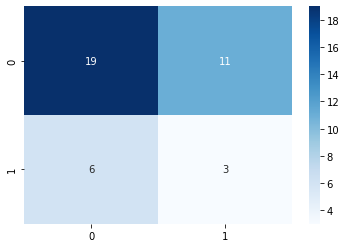

In [9]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_smote, y_train_smote)
y_pred_mnb = mnb.predict(x_test)
print(classification_report(y_pred_mnb, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_mnb))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_mnb), annot=True, fmt='d', cmap='Blues')

#### Logistic Regression Classifier

              precision    recall  f1-score   support

           0       0.43      0.81      0.57        16
           1       0.67      0.26      0.38        23

    accuracy                           0.49        39
   macro avg       0.55      0.54      0.47        39
weighted avg       0.57      0.49      0.45        39

Accuracy:  48.72 %


<AxesSubplot:>

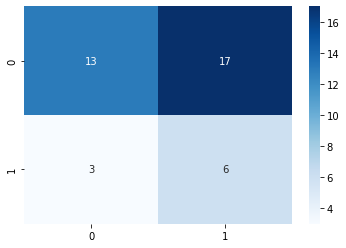

In [10]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train_smote, y_train_smote)
y_pred_logreg = logreg.predict(x_test)
print(classification_report(y_pred_logreg, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_logreg))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_logreg), annot=True, fmt='d', cmap='Blues')

#### K-Nearest Neighbors Classifier

              precision    recall  f1-score   support

           0       0.37      0.65      0.47        17
           1       0.33      0.14      0.19        22

    accuracy                           0.36        39
   macro avg       0.35      0.39      0.33        39
weighted avg       0.35      0.36      0.31        39

Accuracy:  35.9 %


<AxesSubplot:>

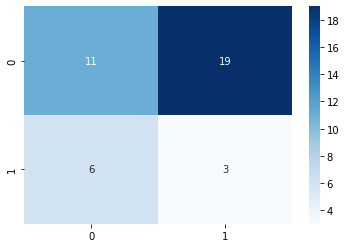

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train_smote, y_train_smote)
y_pred_knn = knn.predict(x_test)
print(classification_report(y_pred_knn, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_knn))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Blues')

#### Linear Support Vector Machine Classifier

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        39
           1       0.00      0.00      0.00         0

    accuracy                           0.77        39
   macro avg       0.50      0.38      0.43        39
weighted avg       1.00      0.77      0.87        39

Accuracy:  76.92 %


d:\Softwares\Python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Softwares\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Softwares\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Softwares\Python\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to contr

<AxesSubplot:>

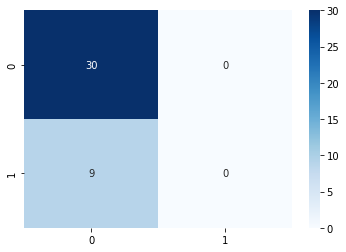

In [12]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(x_train_smote, y_train_smote)
y_pred_lsvc = lsvc.predict(x_test)
print(classification_report(y_pred_lsvc, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_lsvc))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_lsvc), annot=True, fmt='d', cmap='Blues')

#### Support Vector Machine Classifier

              precision    recall  f1-score   support

           0       0.17      0.71      0.27         7
           1       0.78      0.22      0.34        32

    accuracy                           0.31        39
   macro avg       0.47      0.47      0.31        39
weighted avg       0.67      0.31      0.33        39

Accuracy:  30.77 %


<AxesSubplot:>

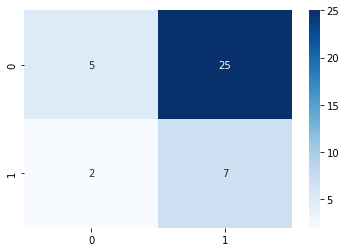

In [13]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train_smote, y_train_smote)
y_pred_svc = svc.predict(x_test)
print(classification_report(y_pred_svc, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_svc))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt='d', cmap='Blues')

#### Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.44      0.57      0.50         7

    accuracy                           0.79        39
   macro avg       0.67      0.71      0.69        39
weighted avg       0.82      0.79      0.80        39

Accuracy:  79.49 %


<AxesSubplot:>

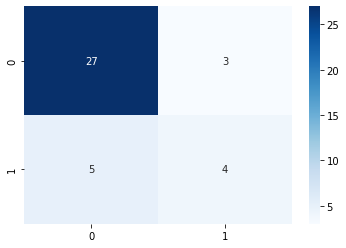

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train_smote, y_train_smote)
y_pred_clf = clf.predict(x_test)
print(classification_report(y_pred_clf, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_clf))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_clf), annot=True, fmt='d', cmap='Blues')

#### Bagging Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.56      0.62      0.59         8

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39

Accuracy:  82.05 %


<AxesSubplot:>

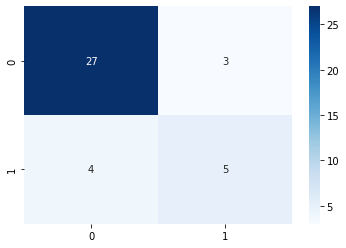

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 

bg=BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=100)
bg.fit(x_train_smote, y_train_smote)
y_pred_bg = bg.predict(x_test)
print(classification_report(y_pred_bg, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_bg))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_bg), annot=True, fmt='d', cmap='Blues')


#### Bosoting Decision Tree Classifier

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.56      0.62      0.59         8

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39

Accuracy:  82.05 %


<AxesSubplot:>

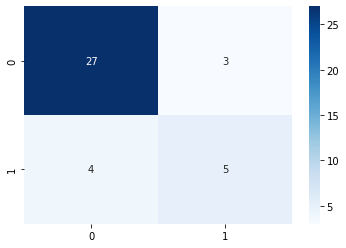

In [16]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(x_train_smote, y_train_smote)

y_pred_adb = adb.predict(x_test)
print(classification_report(y_pred_adb, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_adb))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_adb), annot=True, fmt='d', cmap='Blues')


#### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.90      0.87      0.89        31
           1       0.56      0.62      0.59         8

    accuracy                           0.82        39
   macro avg       0.73      0.75      0.74        39
weighted avg       0.83      0.82      0.82        39

Accuracy:  82.05 %


<AxesSubplot:>

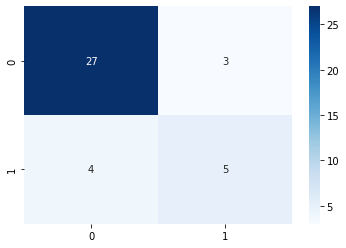

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=9)
rf.fit(x_train_smote, y_train_smote)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_pred_rf, y_test))

print("Accuracy: ", round((100*(accuracy_score(y_test, y_pred_rf))), 2), "%")

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
